In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df=pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Basics of dataset

In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

# Checking missing values

In [7]:
count=df.isnull().sum()
count

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

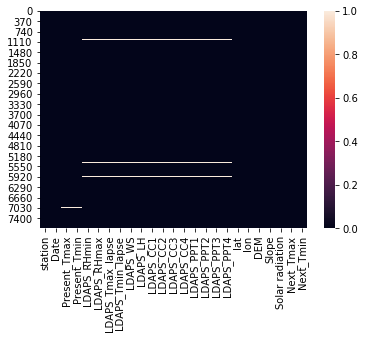

In [8]:
sns.heatmap(df.isnull())

In [9]:
df = df[df.LDAPS_RHmin.notnull()]


In [10]:
count=df.isnull().sum()
count

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
df = df[df.Present_Tmax.notnull()]

In [12]:
count=df.isnull().sum()
count

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           17
Next_Tmin           17
dtype: int64

In [13]:
df = df[df.Next_Tmax.notnull()]

In [14]:
count=df.isnull().sum()
count

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [15]:
df = df[df.station .notnull()]

In [16]:
count=df.isnull().sum()
count

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

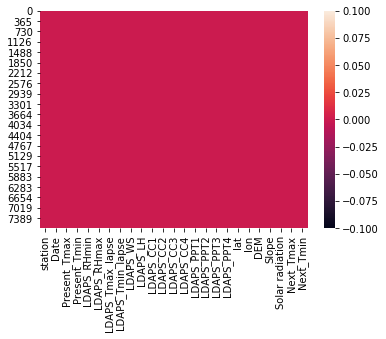

In [17]:
sns.heatmap(df.isnull())

# Visualization

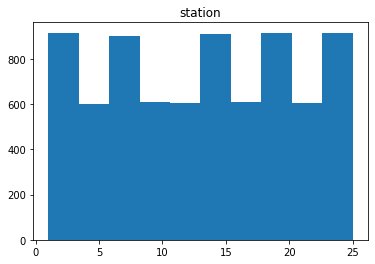

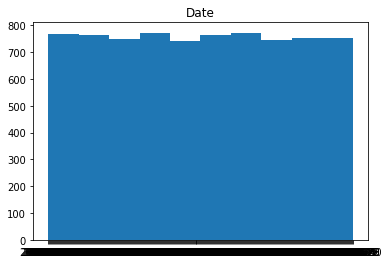

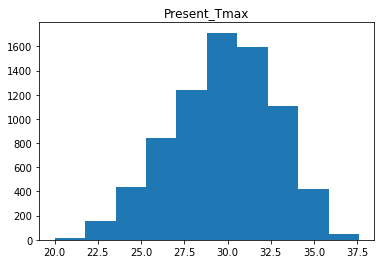

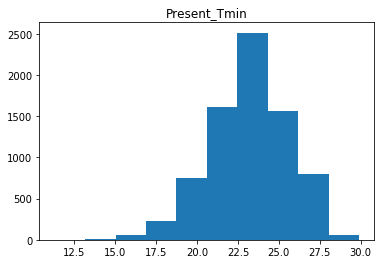

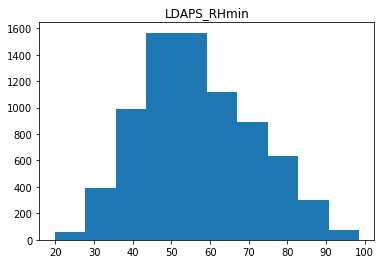

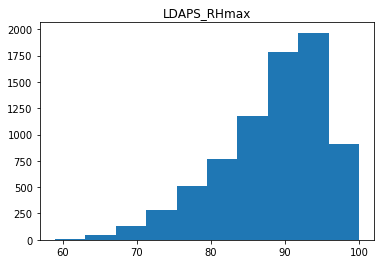

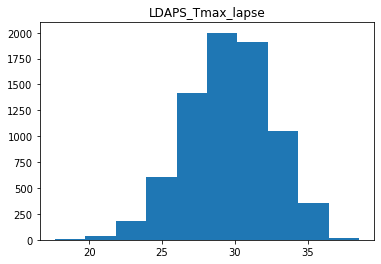

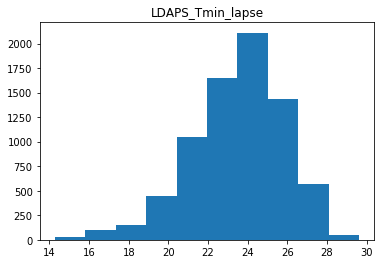

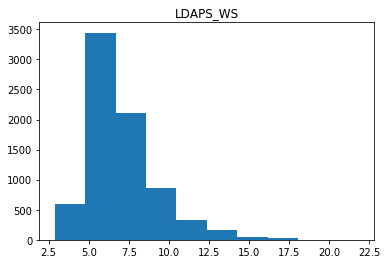

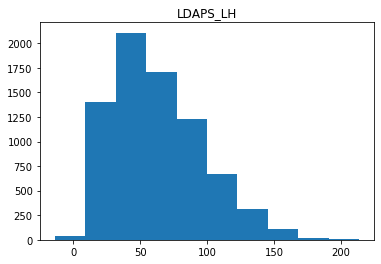

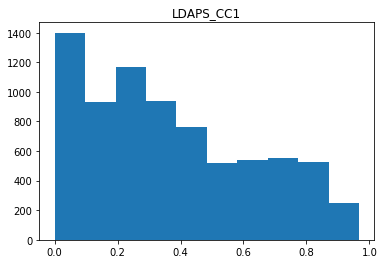

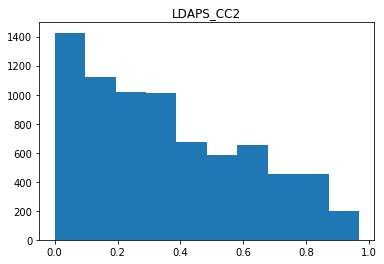

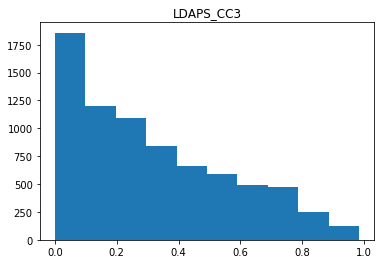

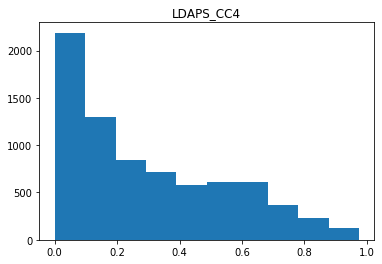

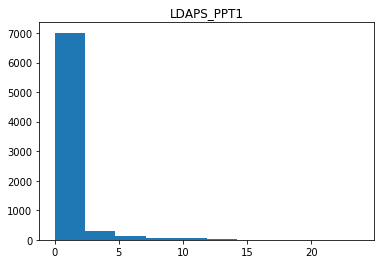

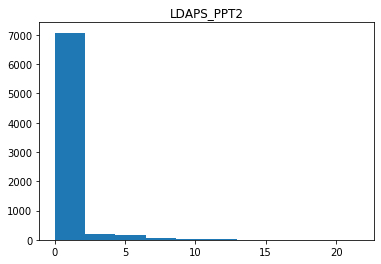

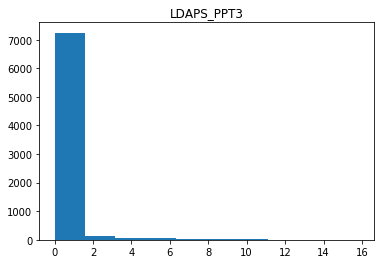

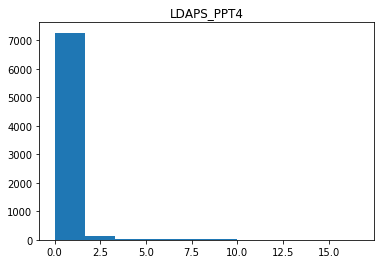

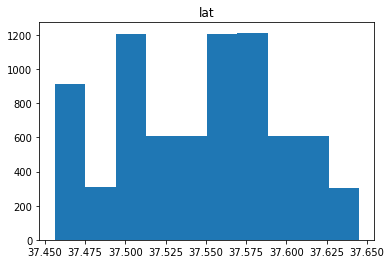

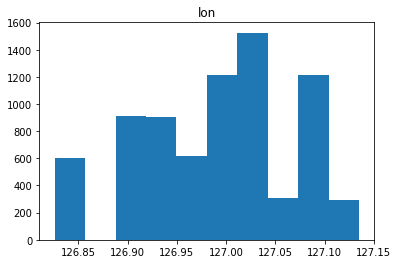

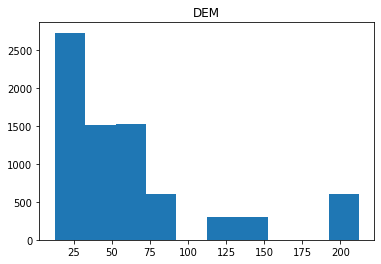

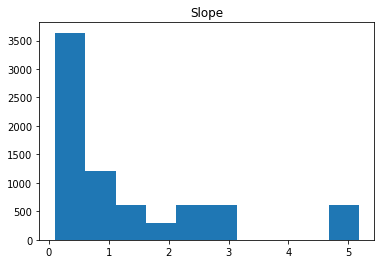

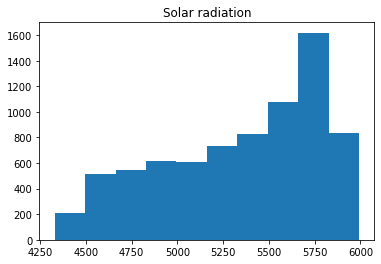

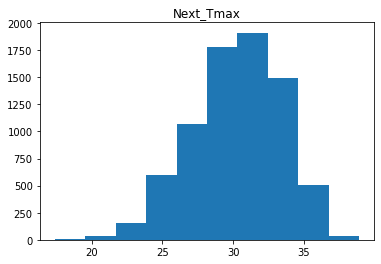

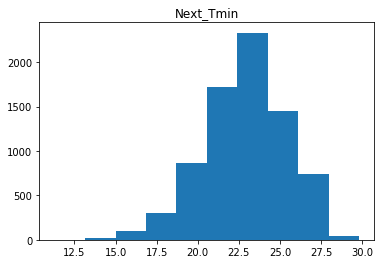

In [18]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

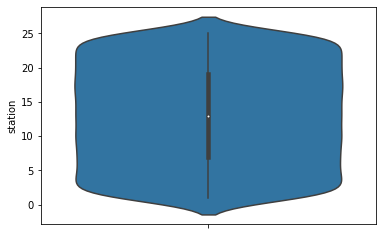

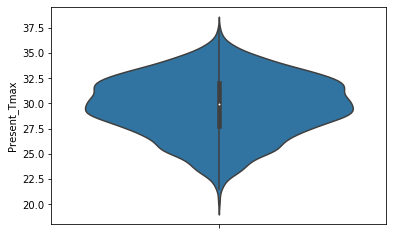

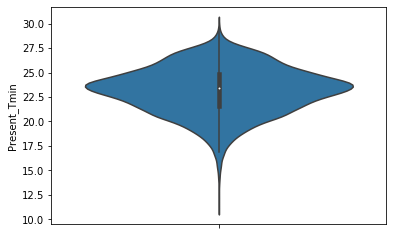

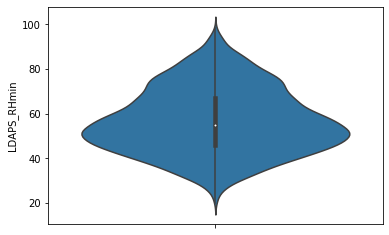

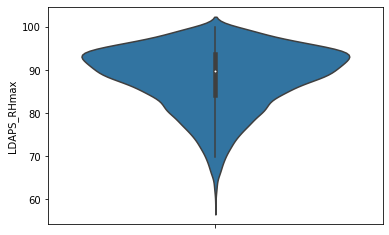

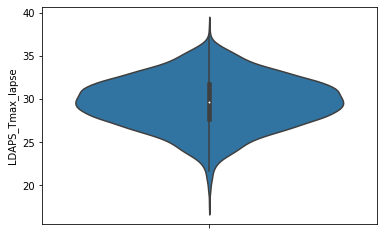

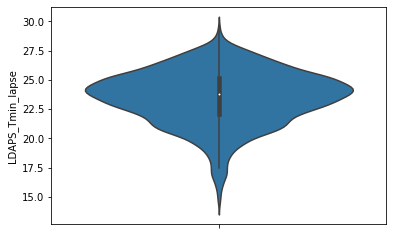

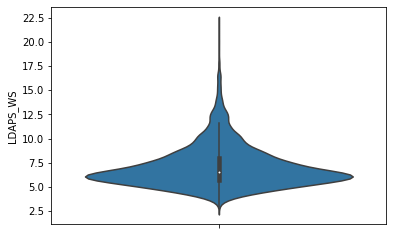

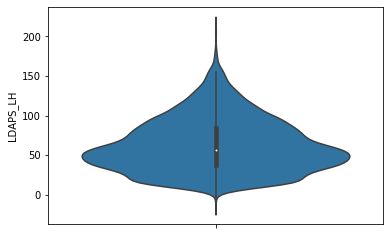

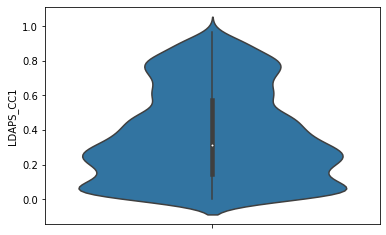

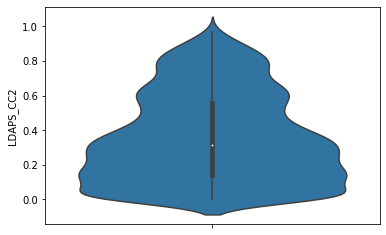

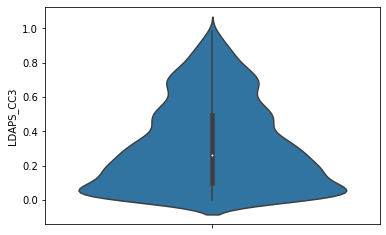

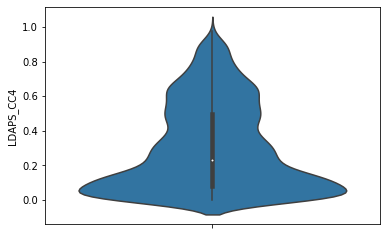

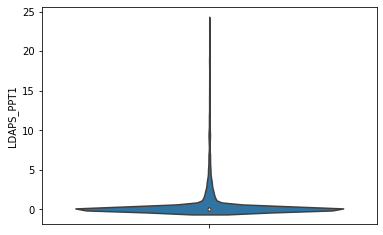

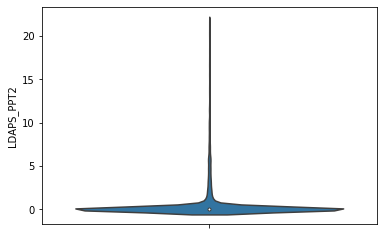

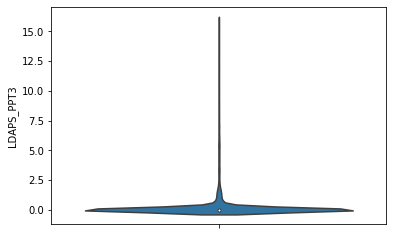

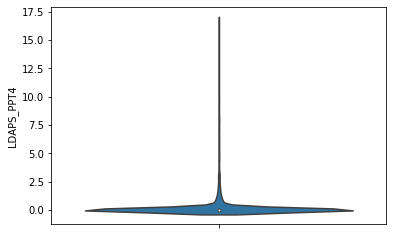

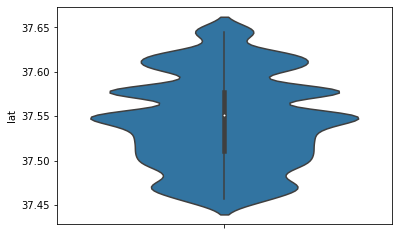

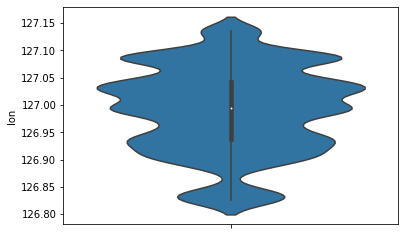

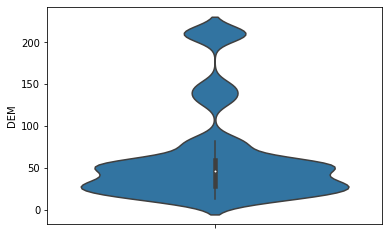

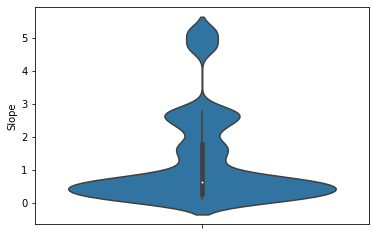

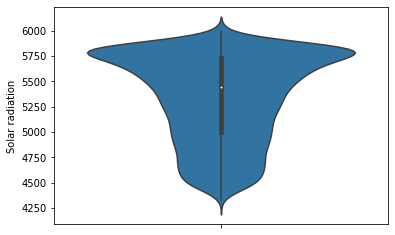

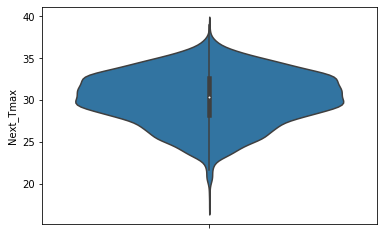

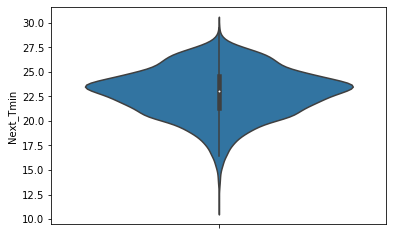

In [19]:
for i in ['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
    sns.violinplot(y=i,data=df)
    plt.show()

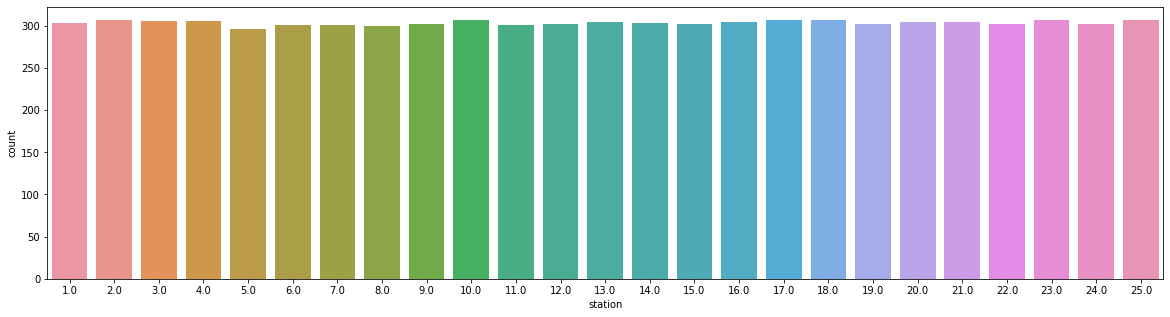

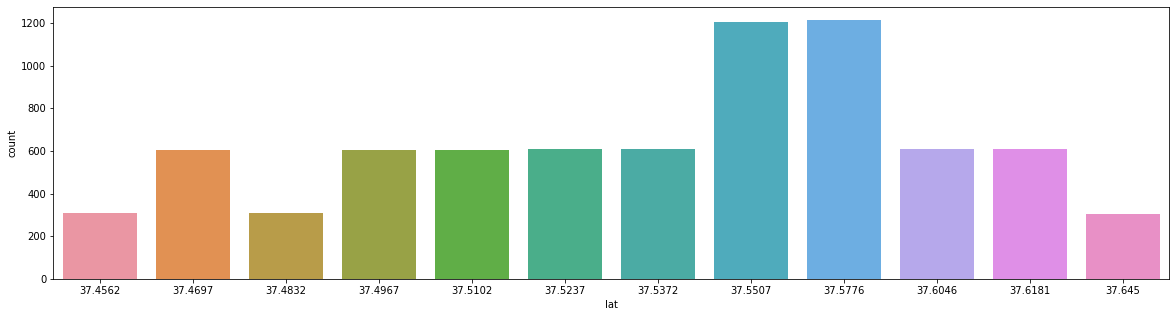

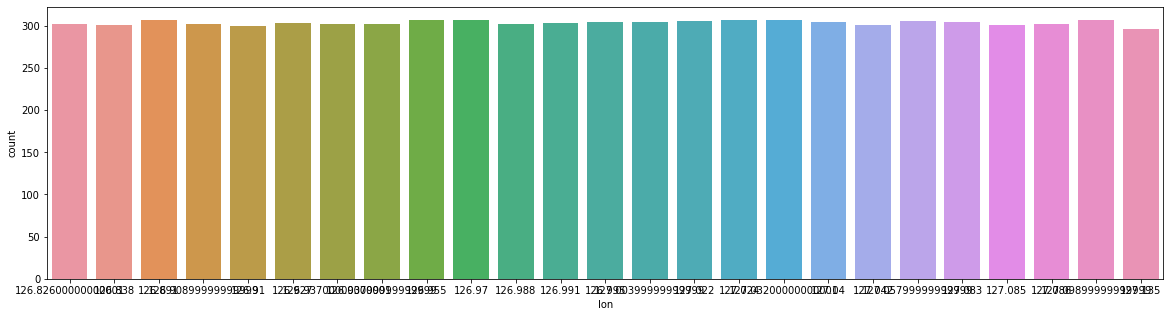

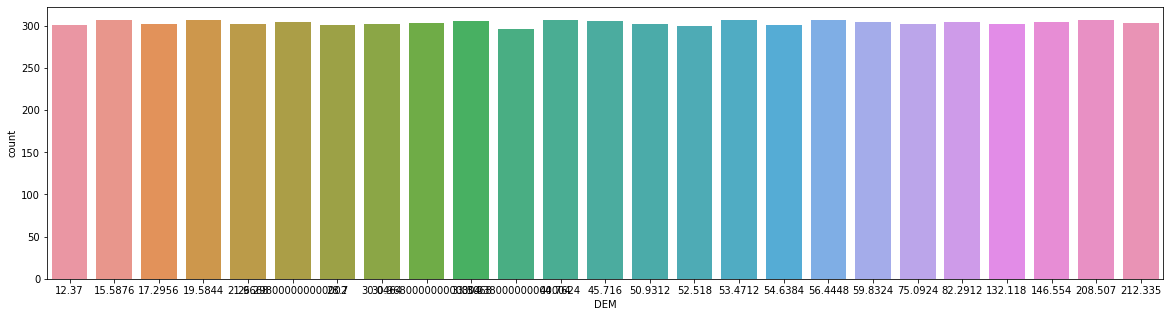

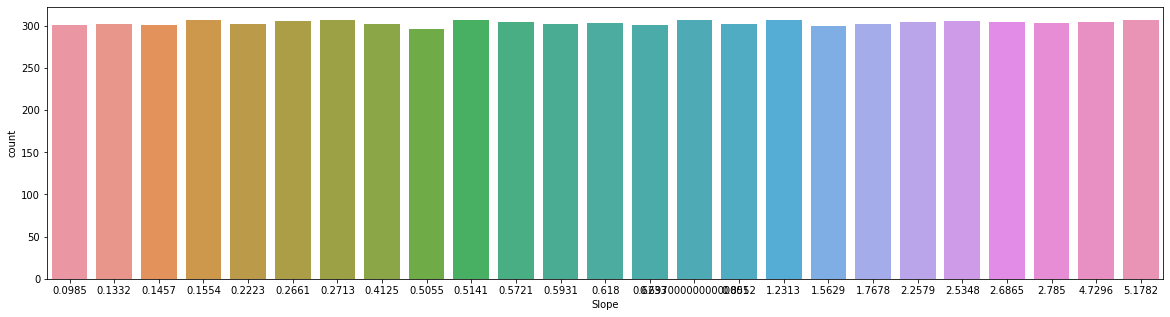

In [20]:
for i in ['station','lat','lon','DEM','Slope']:
    plt.figure(figsize=(20,5))
    sns.countplot(df[i])
    plt.show()

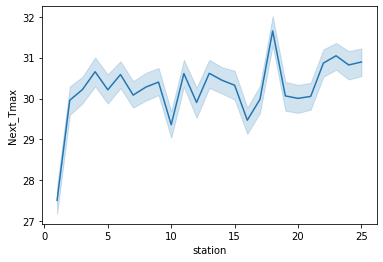

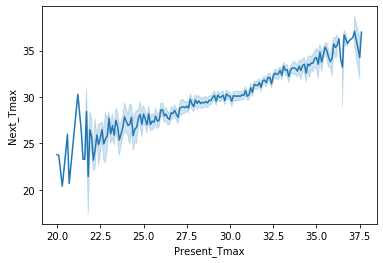

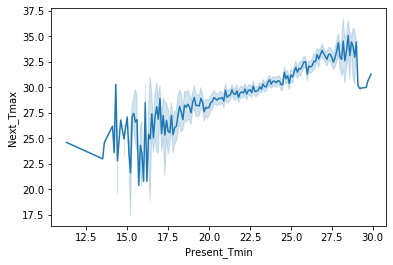

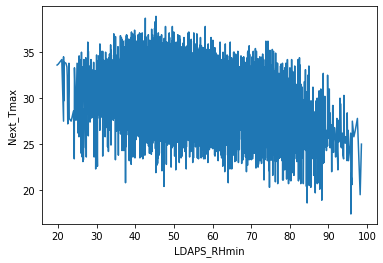

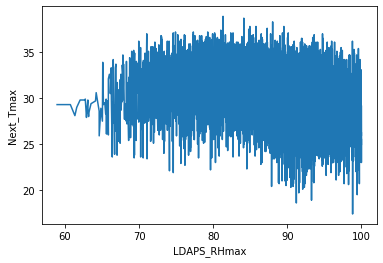

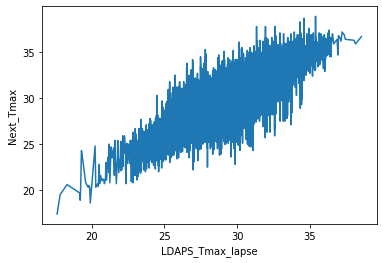

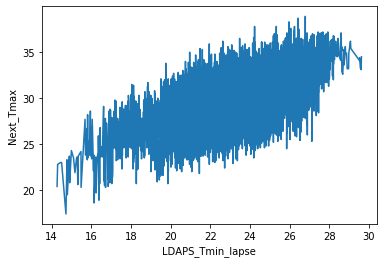

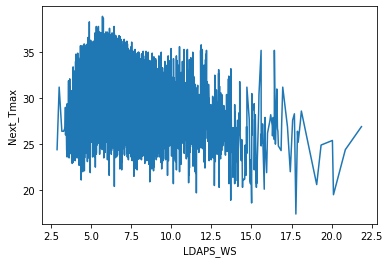

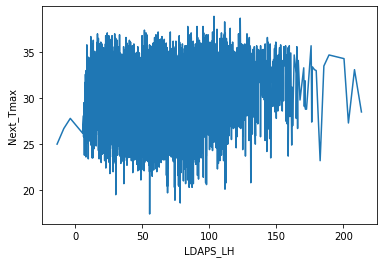

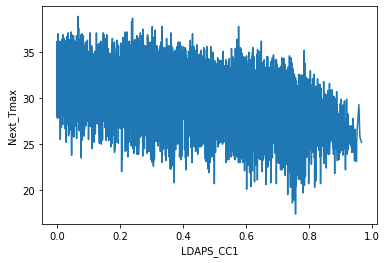

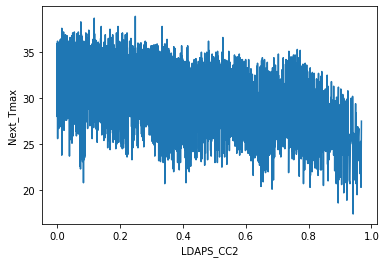

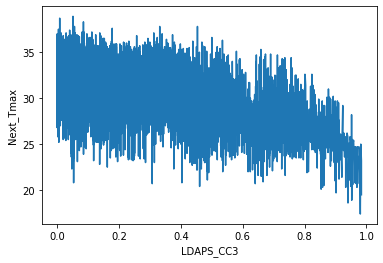

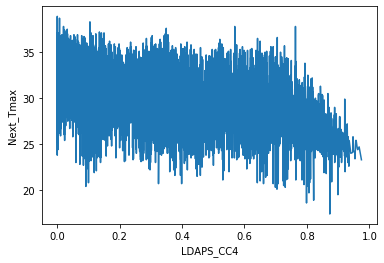

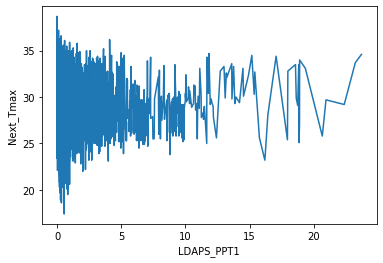

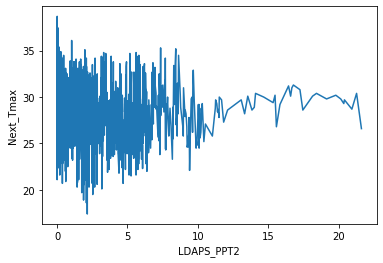

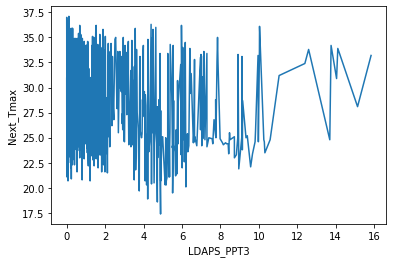

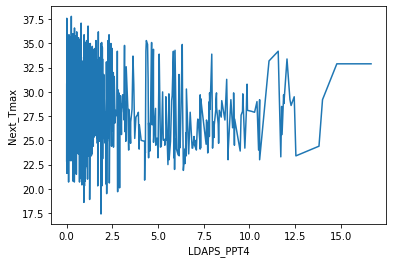

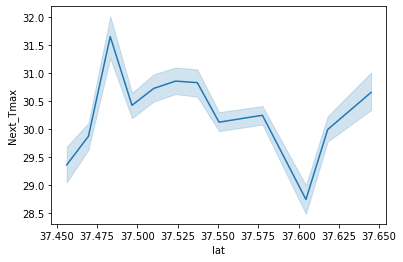

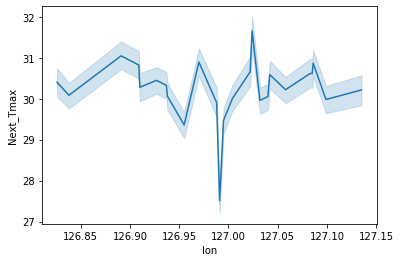

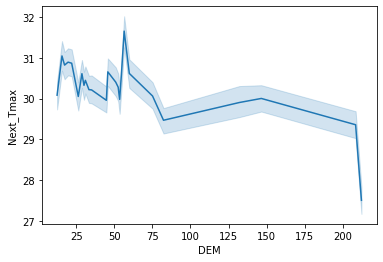

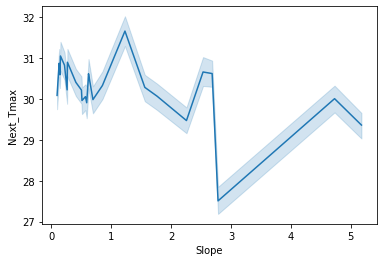

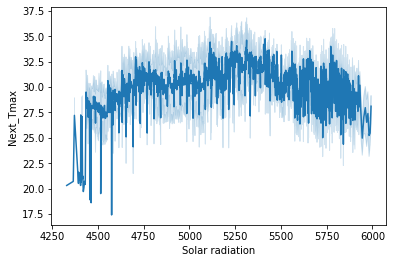

In [21]:
for i in ['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation']:
    sns.lineplot(y=df['Next_Tmax'],x=df[i],data=df)
    plt.show()

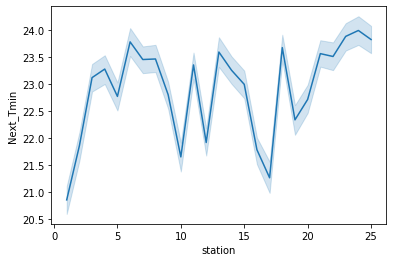

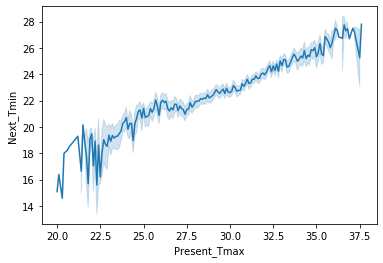

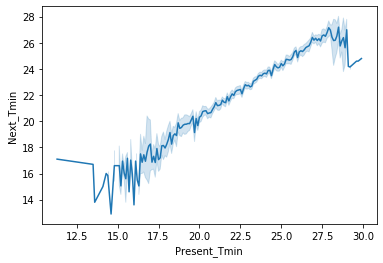

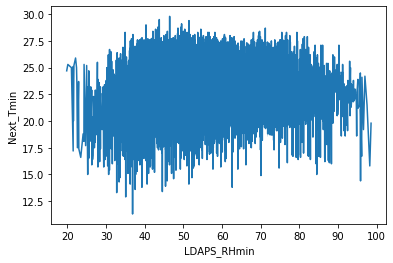

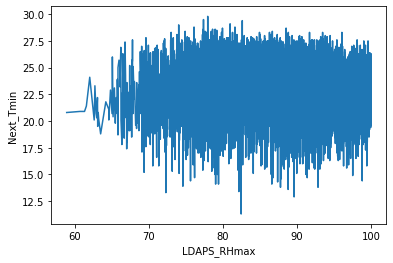

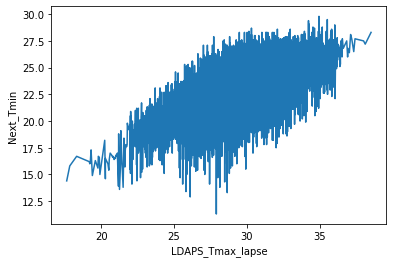

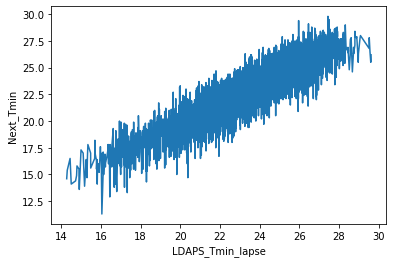

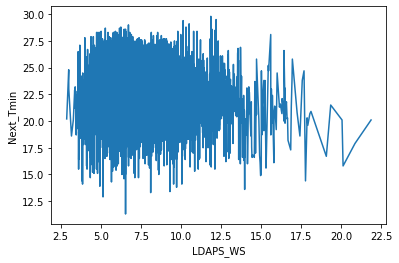

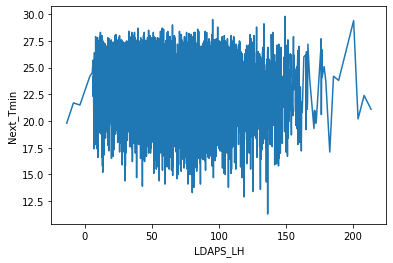

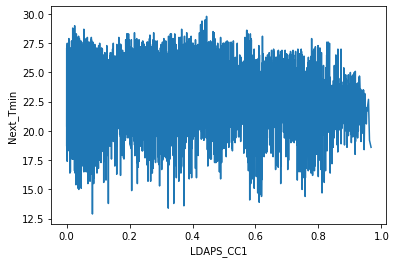

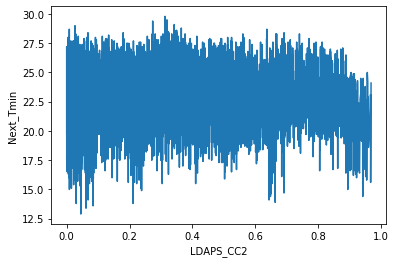

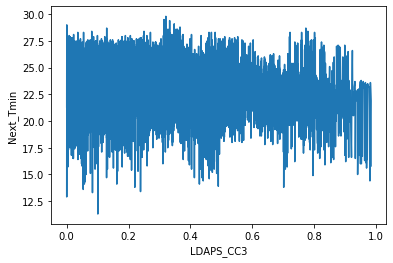

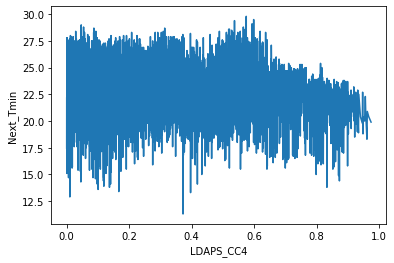

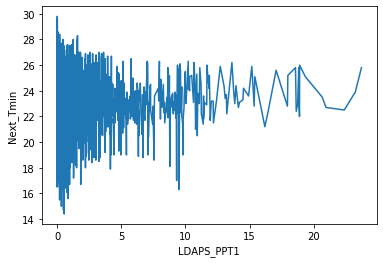

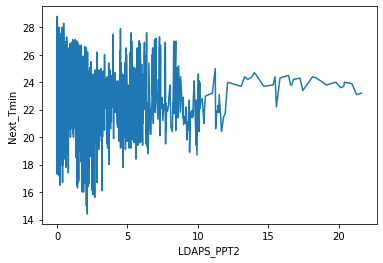

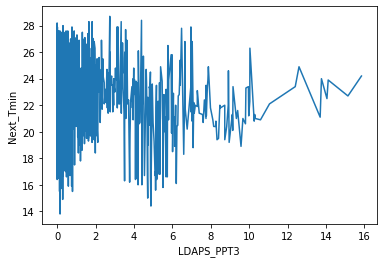

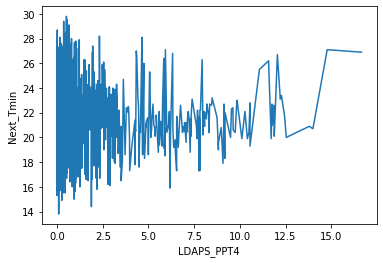

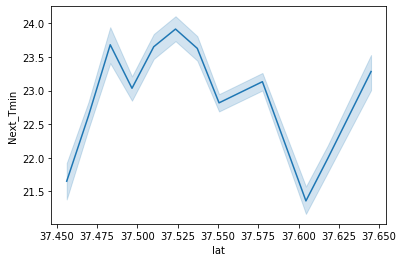

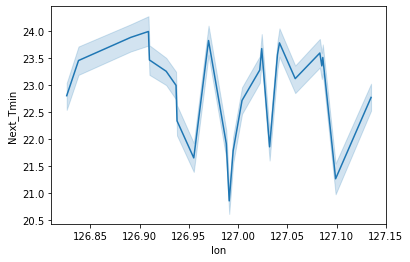

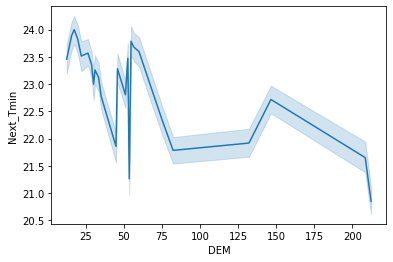

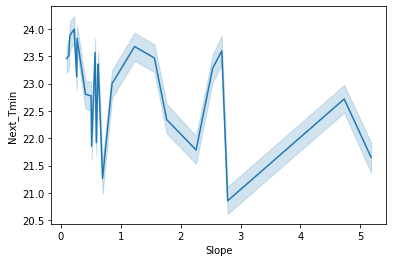

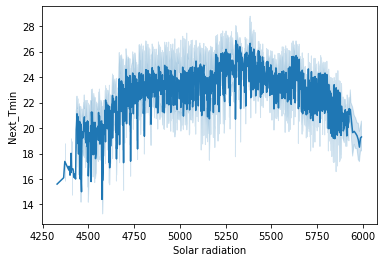

In [22]:
for i in ['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation']:
    sns.lineplot(y=df['Next_Tmin'],x=df[i],data=df)
    plt.show()

In [23]:
#sns.pairplot(df)

# Convert 'Date' into usable numeric dtype

In [24]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013


In [25]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6


In [26]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


In [27]:
df.drop(columns=['Date'],inplace=True)

In [28]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


In [29]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
year                  int64
month                 int64
day                   int64
dtype: object

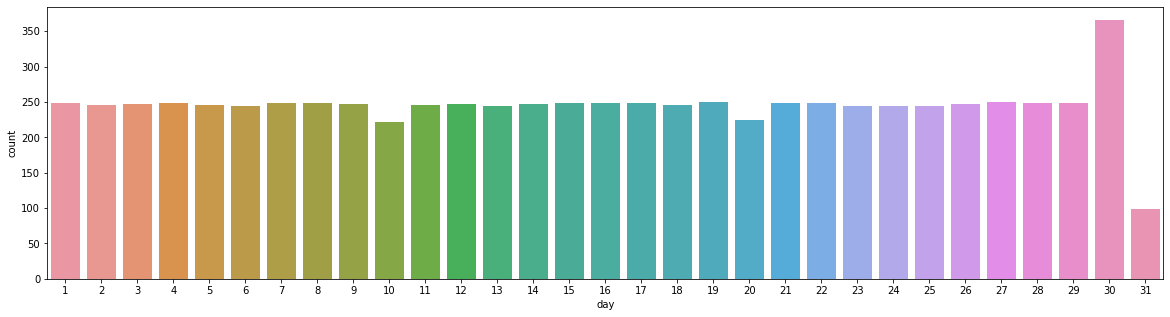

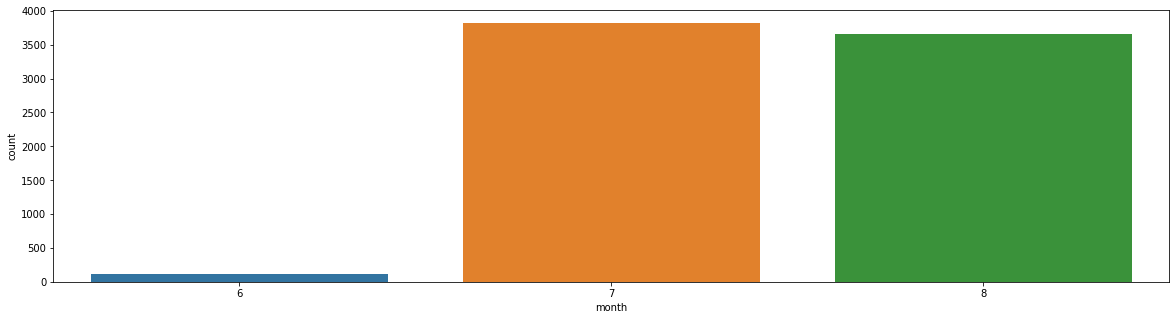

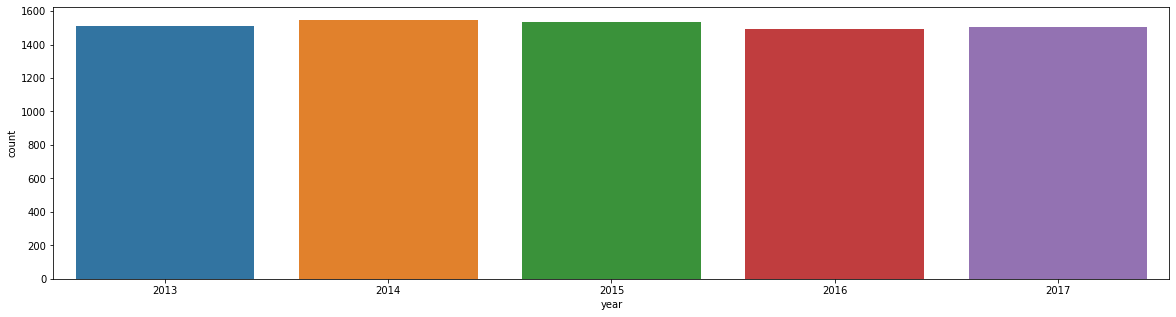

In [30]:
for i in ['day','month','year']:
    plt.figure(figsize=(20,5))
    sns.countplot(df[i])
    plt.show()

In [31]:
import statistics
for i in ['day','month','year']:
    print(statistics.mode(df[i]))

30
7
2014


# Correlation matrix

In [32]:
dco=df.corr()

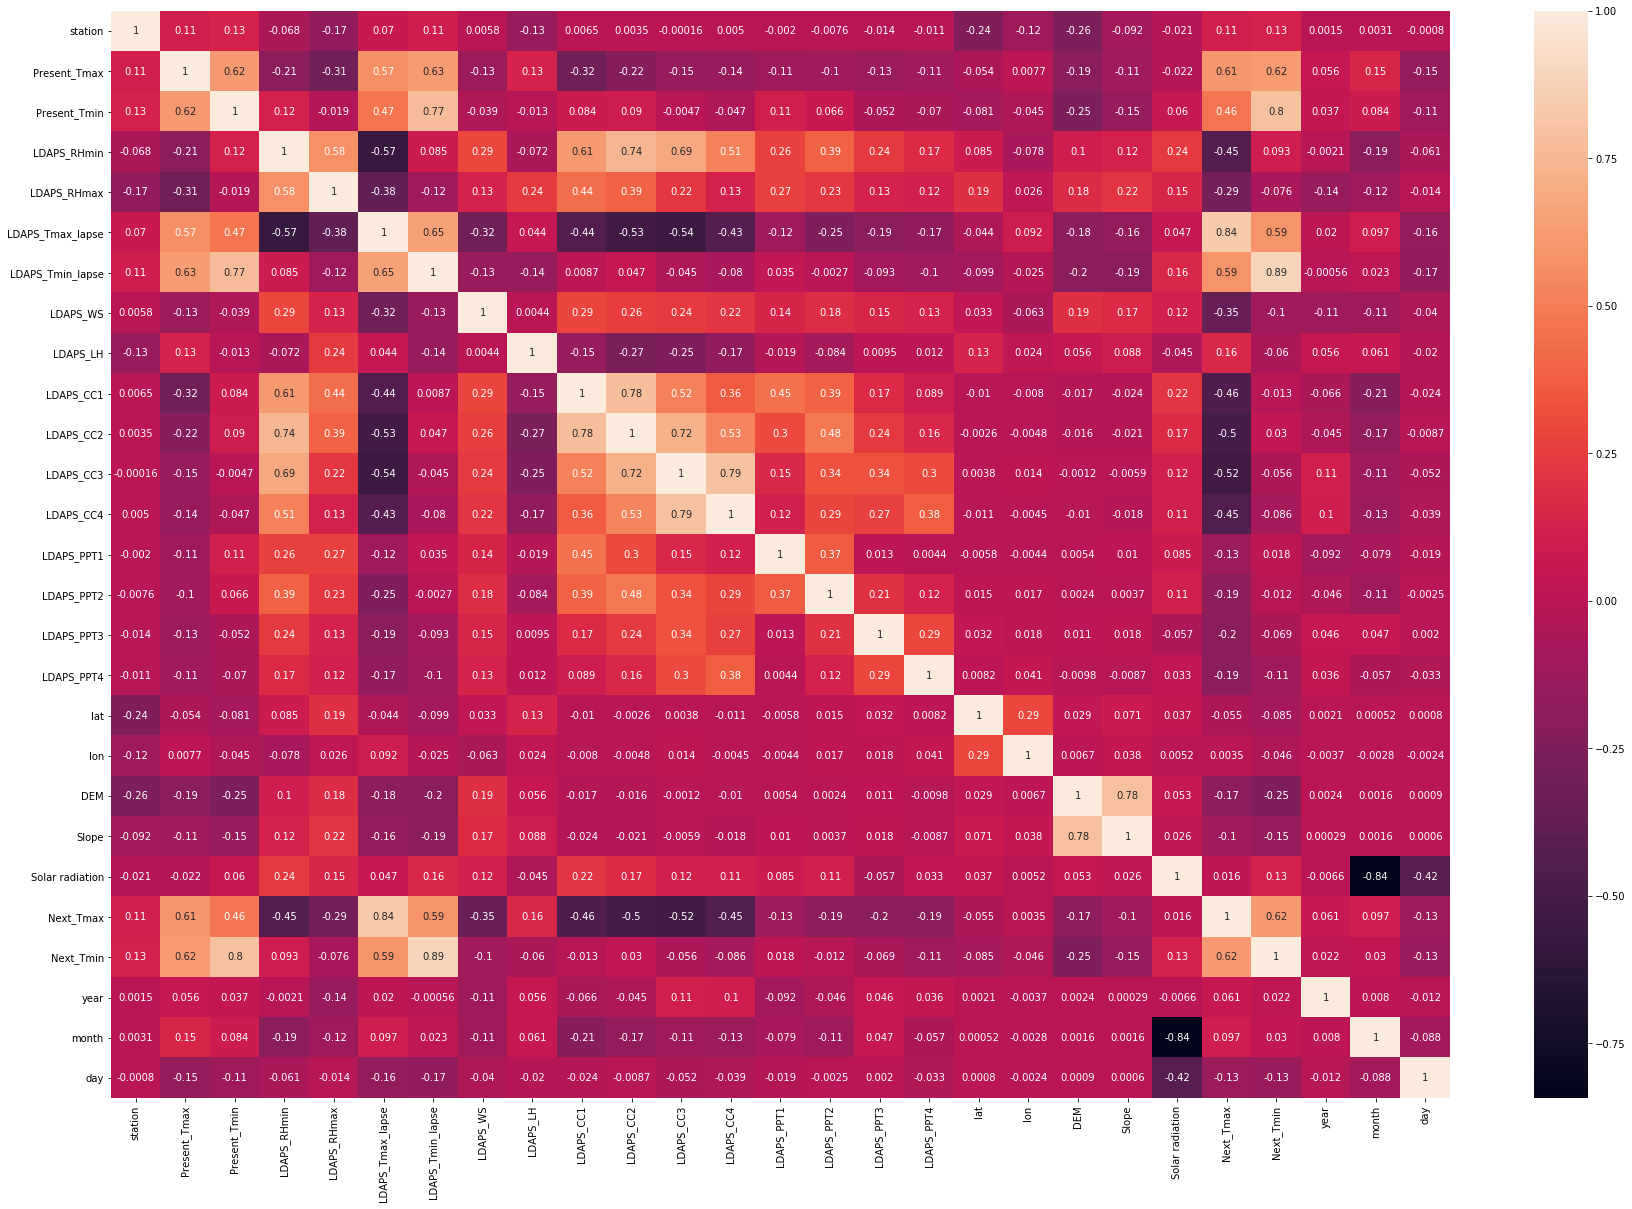

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(dco,annot=True)

# Statistics Summary

In [34]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.465999,15.939510
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,0.528635,8.906521
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


# Checking for skewness and outliers distribution:-

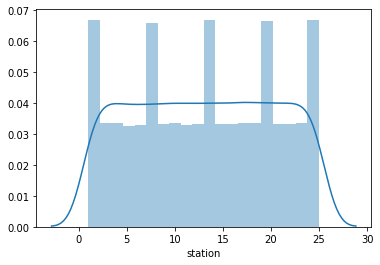

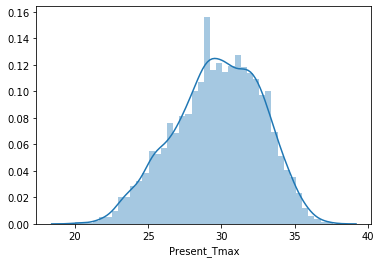

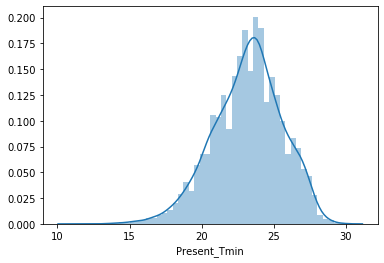

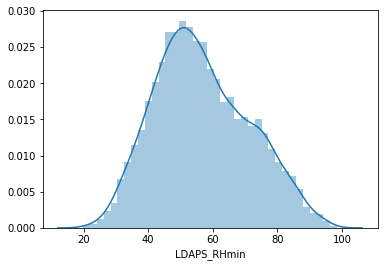

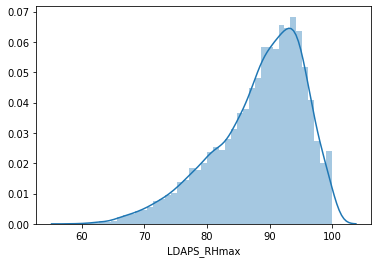

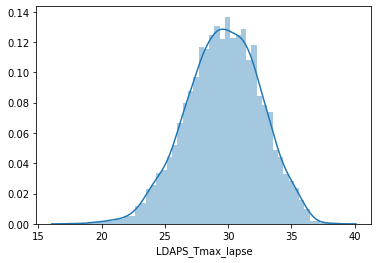

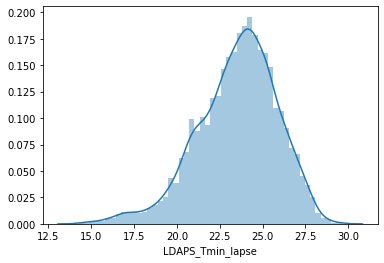

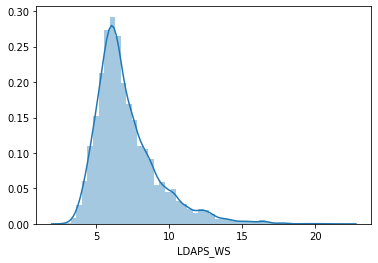

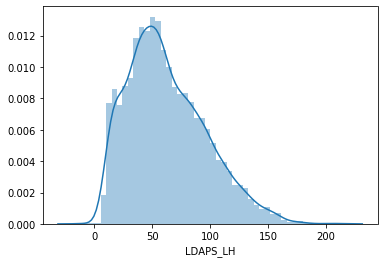

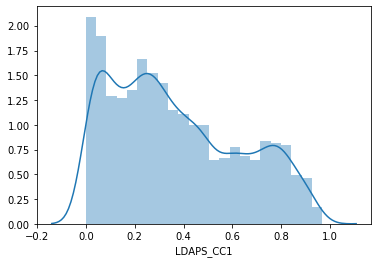

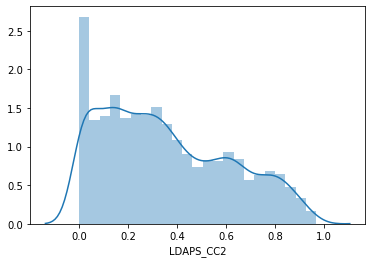

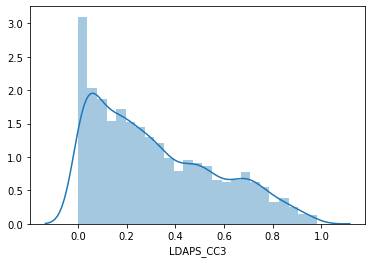

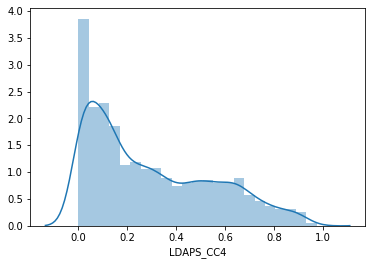

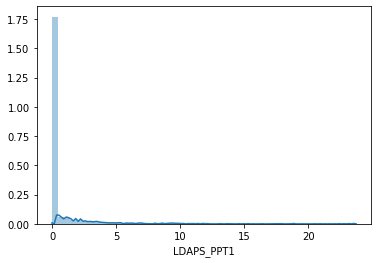

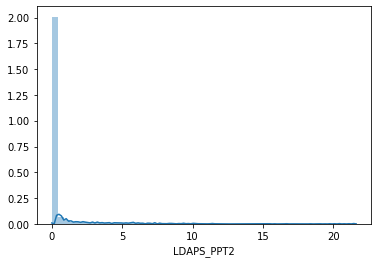

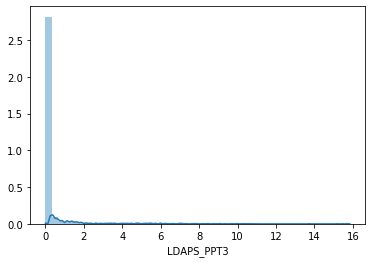

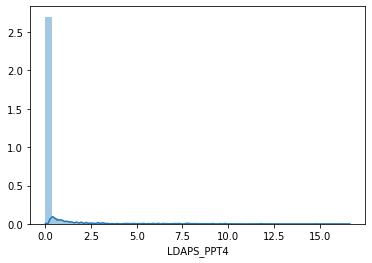

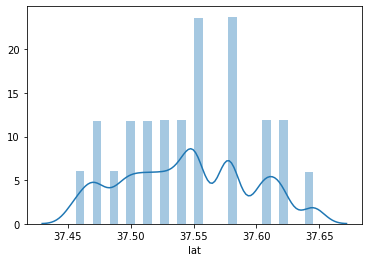

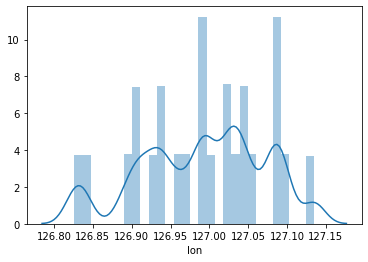

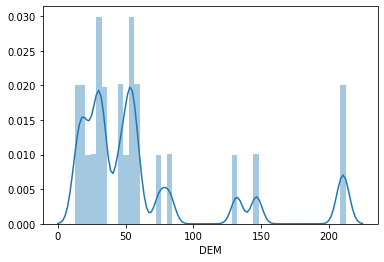

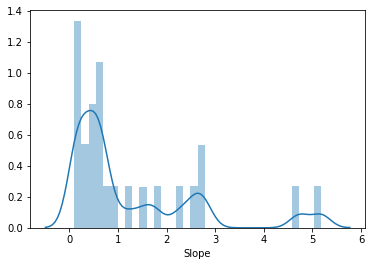

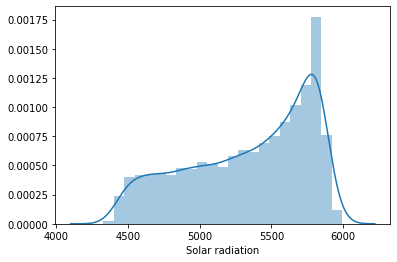

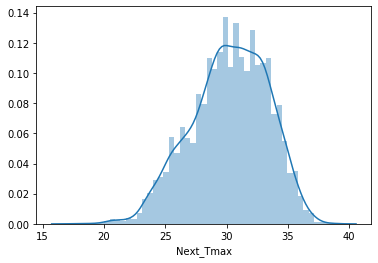

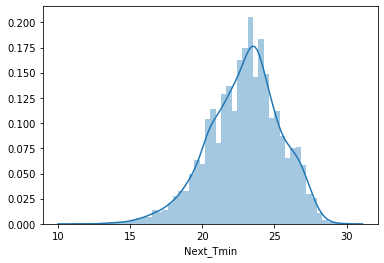

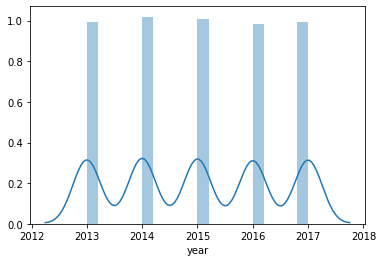

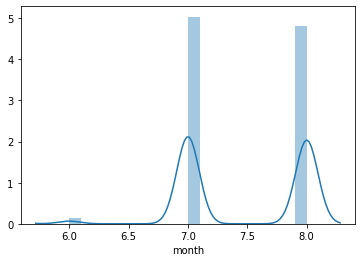

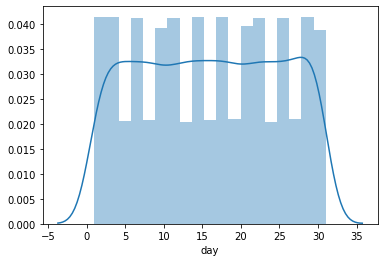

In [35]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    

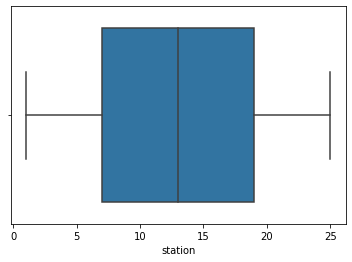

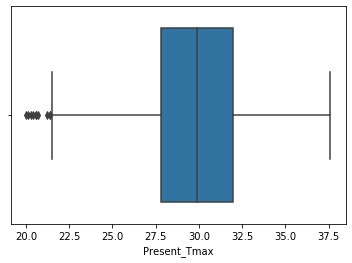

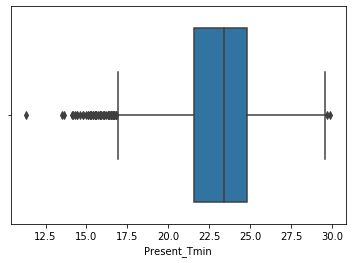

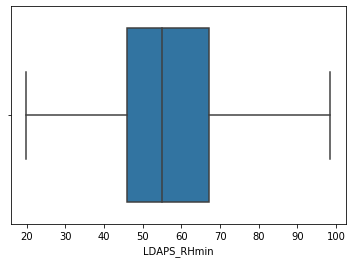

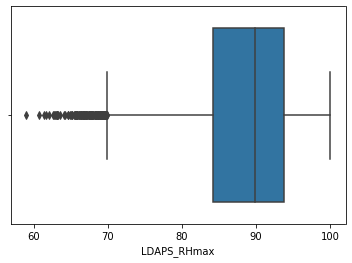

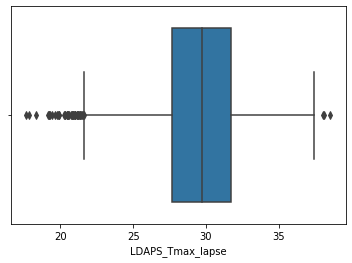

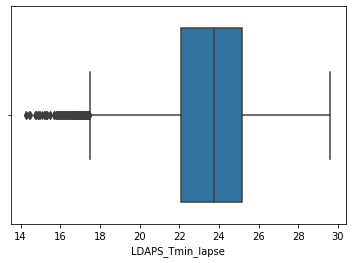

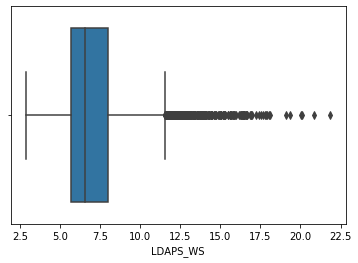

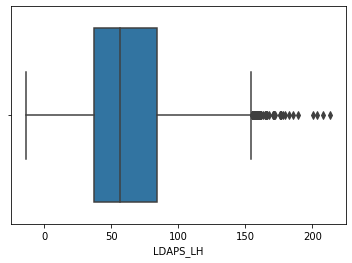

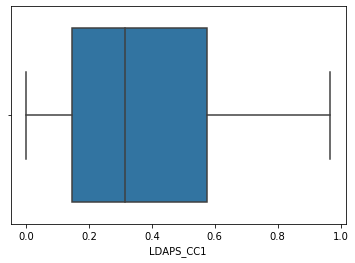

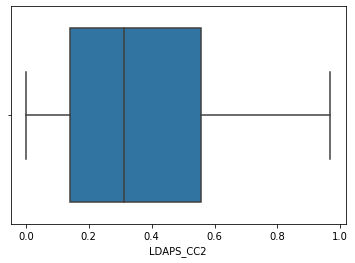

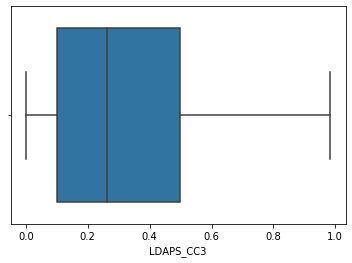

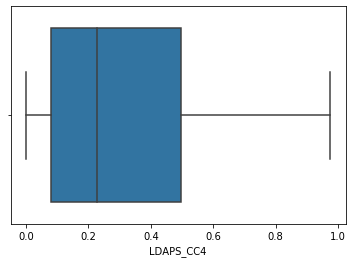

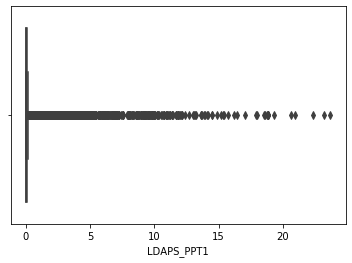

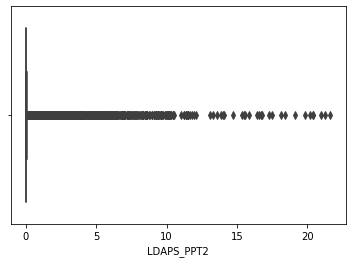

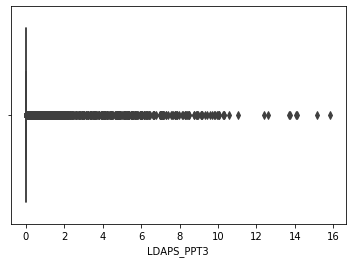

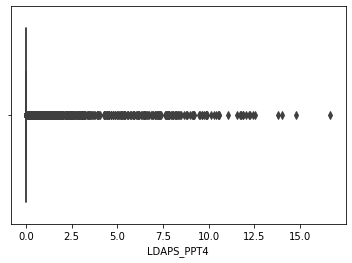

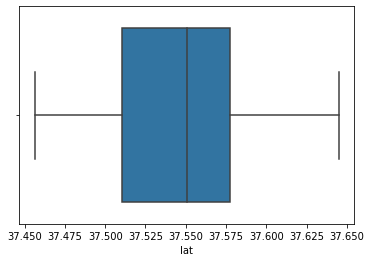

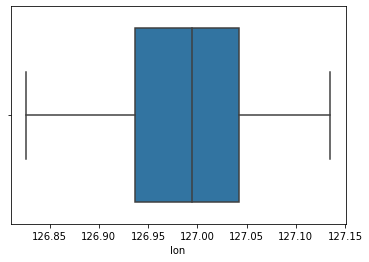

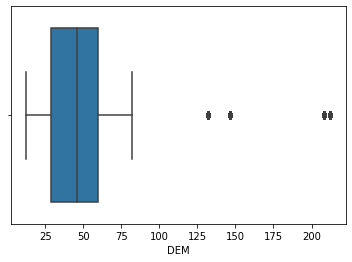

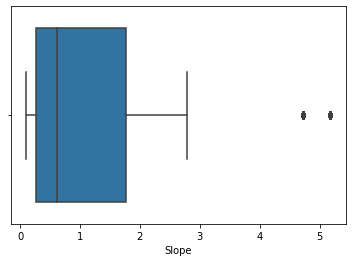

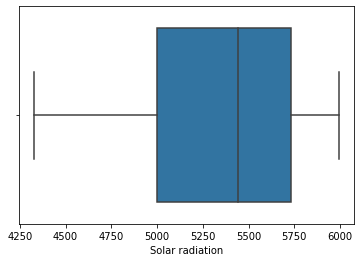

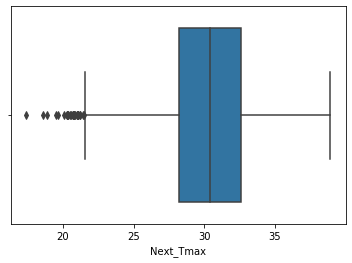

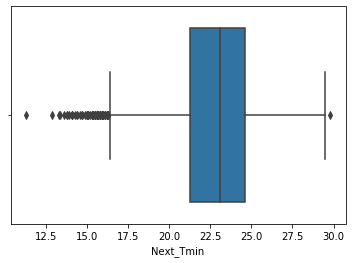

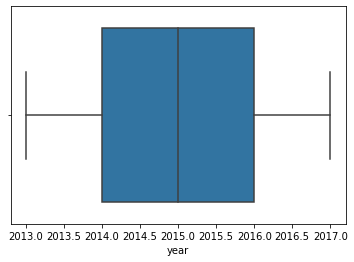

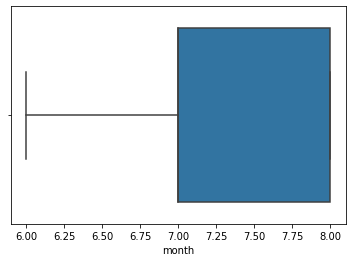

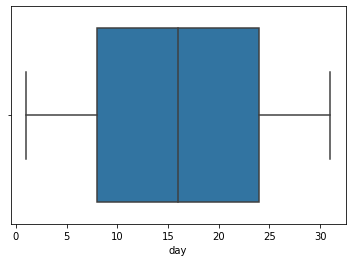

In [36]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# The skewed data and certain outliers need to be cleaned

In [37]:
from scipy.stats import zscore

In [38]:
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(7588, 27)
(6739, 27)


In [39]:
dffinal.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
year                0.025066
month              -0.168571
day                 0.000057
dtype: float64

In [40]:
for col in dffinal.columns:
    if dffinal.skew().loc[col]>0.55:
        dffinal[col]=np.log1p(dffinal[col])

In [41]:
dffinal.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.616039
LDAPS_CC1           0.329077
LDAPS_CC2           0.505774
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
year                0.025066
month              -0.168571
day                 0.000057
dtype: float64

# Now,scaling of data has to be done

In [42]:
dffinal.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
day                 0
dtype: int64

In [43]:
dffinal = dffinal[dffinal.LDAPS_LH.notnull()]

In [44]:
dffinal.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
day                 0
dtype: int64

In [45]:
xn=dffinal.drop(columns=['Next_Tmax','Next_Tmin'])
yn=dffinal['Next_Tmax']
zn=dffinal['Next_Tmin']

In [46]:
x2n=pd.DataFrame(data=xn)

In [47]:
xn.shape

(6738, 25)

In [48]:
x2n.shape

(6738, 25)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scale=StandardScaler()
xn=scale.fit_transform(xn)


In [51]:
xd=pd.DataFrame(xn)

In [52]:
xd.skew()

0    -0.001298
1    -0.269998
2    -0.221470
3     0.308450
4    -0.686460
5    -0.110558
6    -0.379435
7     0.473446
8    -0.616039
9     0.328875
10    0.505553
11    0.440574
12    0.495116
13    2.748079
14    3.638150
15    4.234056
16    4.611231
17    0.107204
18   -0.277454
19    0.451073
20    0.845872
21   -0.520120
22    0.025272
23   -0.168882
24    0.000006
dtype: float64

In [53]:
xd.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [54]:
yn.isnull().sum()

0

In [55]:
zn.isnull().sum()

0

# Splitting the dataset at 20% into train and test dataset with output variable yn

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=42)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [58]:
def maxr2_score(regr,xd,yn):
    max_r_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        r2_scr=r2_score(ytest,ypred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score= r2_scr
            finalrstate=r_state
    print('max r2 score corresponding to',finalrstate,'is',max_r_score)
    return finalrstate

# Using GridSearchCV to hypertune

In [59]:
lr = LinearRegression()
svr = SVR()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
ada=AdaBoostRegressor()
dtr=DecisionTreeRegressor()

parameters={'C': [10, 1.0,0.1],'kernel':['linear','poly', 'rbf']}
clf=GridSearchCV(svr,parameters)
clf.fit(xd,yn)
print('best SVR parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knr,parameters)
clf.fit(xd,yn)
print('best KNR parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(xd,yn)
print('best RFR parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(xd,yn)
print('best GBR parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtr]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd,yn)
print('best ADA parameters is :',clf.best_params_)
print('\n')
alphavalue={'alpha':[1,0.1,0.001]}
list=[Lasso(),Ridge(),ElasticNet()]
for i in list:
    grid=GridSearchCV(estimator=i,param_grid=alphavalue)
    grid.fit(xd,yn)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

best SVR parameters is : {'C': 0.1, 'kernel': 'linear'}


best KNR parameters is : {'n_neighbors': 29}


best RFR parameters is : {'n_estimators': 250}


best GBR parameters is : {'learning_rate': 0.1, 'n_estimators': 100}


best ADA parameters is : {'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 1, 'n_estimators': 250}


0.6790206355746534
0.1
{'alpha': 0.1}


0.6444297659995041
1
{'alpha': 1}


0.6806473041119018
0.1
{'alpha': 0.1}




In [60]:
lr = LinearRegression()
r_state=maxr2_score(lr,xd,yn)
print('\n')
svr = SVR(C=0.1,kernel='linear')
r_state=maxr2_score(svr,xd,yn)
print('\n')
knr=KNeighborsRegressor(n_neighbors= 29)
r_state=maxr2_score(knr,xd,yn)
print('\n')
rfr=RandomForestRegressor(n_estimators=250)
r_state=maxr2_score(rfr,xd,yn)
print('\n')
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,xd,yn)
print('\n')
ada=AdaBoostRegressor(learning_rate=1,n_estimators=250,base_estimator=dtr)
r_state=maxr2_score(ada,xd,yn)
print('\n')
ela=ElasticNet(alpha=0.1)
r_state=maxr2_score(ela,xd,yn)
print('\n')

r2 score corresponding to  42 is 0.7357993643487922
r2 score corresponding to  43 is 0.779840624976498
r2 score corresponding to  44 is 0.7773721466505347
r2 score corresponding to  45 is 0.7420610063343767
r2 score corresponding to  46 is 0.76648346963581
r2 score corresponding to  47 is 0.7610555705892829
r2 score corresponding to  48 is 0.7527986345115038
r2 score corresponding to  49 is 0.772360150704948
r2 score corresponding to  50 is 0.7421334034072318
r2 score corresponding to  51 is 0.7558724080213667
r2 score corresponding to  52 is 0.7768613118517671
r2 score corresponding to  53 is 0.7613077687759154
r2 score corresponding to  54 is 0.7607347658176702
r2 score corresponding to  55 is 0.7761936379542738
r2 score corresponding to  56 is 0.740213791004241
r2 score corresponding to  57 is 0.7522847624962569
r2 score corresponding to  58 is 0.7627457275834257
r2 score corresponding to  59 is 0.7629078775641776
r2 score corresponding to  60 is 0.756266097950202
r2 score correspon

r2 score corresponding to  82 is 0.7831564307491233
r2 score corresponding to  83 is 0.798465630749167
r2 score corresponding to  84 is 0.8122841148102237
r2 score corresponding to  85 is 0.7874158634935863
r2 score corresponding to  86 is 0.8081987900603429
r2 score corresponding to  87 is 0.8000195964524295
r2 score corresponding to  88 is 0.7830154781637957
r2 score corresponding to  89 is 0.8029602027690883
r2 score corresponding to  90 is 0.7979065925605375
r2 score corresponding to  91 is 0.8009365041184768
r2 score corresponding to  92 is 0.8070046765308443
r2 score corresponding to  93 is 0.7932783560173415
r2 score corresponding to  94 is 0.8024310508943503
r2 score corresponding to  95 is 0.7881853240072276
r2 score corresponding to  96 is 0.7871658747573211
r2 score corresponding to  97 is 0.778085132930192
r2 score corresponding to  98 is 0.7793666447872895
r2 score corresponding to  99 is 0.8047828078307236
max r2 score corresponding to 52 is 0.816981872302502


r2 score c

r2 score corresponding to  63 is 0.9197557217524073
r2 score corresponding to  64 is 0.9200085093557724
r2 score corresponding to  65 is 0.9257900919026617
r2 score corresponding to  66 is 0.9304573771476347
r2 score corresponding to  67 is 0.9197665066189983
r2 score corresponding to  68 is 0.9260223741695788
r2 score corresponding to  69 is 0.9227611189357329
r2 score corresponding to  70 is 0.9257521376946096
r2 score corresponding to  71 is 0.922087587697172
r2 score corresponding to  72 is 0.9305322476268332
r2 score corresponding to  73 is 0.9279446119107164
r2 score corresponding to  74 is 0.9215316875043688
r2 score corresponding to  75 is 0.9199883967908007
r2 score corresponding to  76 is 0.9084987259149935
r2 score corresponding to  77 is 0.9261636977199104
r2 score corresponding to  78 is 0.9270653221303239
r2 score corresponding to  79 is 0.9252903776177197
r2 score corresponding to  80 is 0.9217919375383599
r2 score corresponding to  81 is 0.9292134075699799
r2 score corr

In [61]:
models=[]
models.append(('LinearRegression',lr))
models.append(('SVR',svr))
models.append(('kNeighborsRegressor',knr))
models.append(('RFR',rfr))
models.append(('GBR',gbr))
models.append(('ADAREG',ada))
models.append(('Elastic',ela))


In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
Model=[]
score=[]
cvs=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    RS=r2_score(ytest,pre)
    print('r2 score',RS)
    score.append(RS*100)
    print('\n')
    sc=cross_val_score(model,xd,yn,cv=5,scoring='r2').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')

****,name,****


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 score 0.7357993643487922


Cross val score 0.6438402736958062


****,name,****


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 score 0.7325206408501437


Cross val score 0.6712353953201898


****,name,****


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                    weights='uniform')


r2 score 0.788708694986775


Cross val score 0.5376082713798529


****,name,****


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min

In [64]:
result=pd.DataFrame({'Model':Model,'r2_score': score,'Cross val score': cvs})
result

,Model,r2_score,Cross val score
0,LinearRegression,73.579936,64.384027
1,SVR,73.252064,67.123540
2,kNeighborsRegressor,78.870869,53.760827
3,RFR,88.513622,66.645134
4,GBR,83.569752,68.708507
5,ADAREG,91.109830,66.788865
6,Elastic,73.074038,68.064730


# After having tried all the above models , GBR is working best
Also, random state corresponding to max r2 score in GBR is 84

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=84)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)

# Final model is as follows

In [66]:
print('RMSE is',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score is',r2_score(ytest,ypred))

RMSE is 1.1416814553690124
r2_score is 0.8377615419223363


# Saving the model

In [67]:
joblib.dump(gbr,'Model_temperature.obj')

['Model_temperature.obj']

In [68]:
model=joblib.load('Model_temperature.obj')

In [69]:
model.predict(xtest)

array([34.20529161, 34.91028041, 32.89591423, ..., 26.74296447,
       31.90872288, 32.01553763])

# Working with Next day min as the output

In [70]:
scale=StandardScaler()
x2n=scale.fit_transform(x2n)


In [71]:
xd2=pd.DataFrame(x2n)

In [72]:
xd2.skew()

0    -0.001298
1    -0.269998
2    -0.221470
3     0.308450
4    -0.686460
5    -0.110558
6    -0.379435
7     0.473446
8    -0.616039
9     0.328875
10    0.505553
11    0.440574
12    0.495116
13    2.748079
14    3.638150
15    4.234056
16    4.611231
17    0.107204
18   -0.277454
19    0.451073
20    0.845872
21   -0.520120
22    0.025272
23   -0.168882
24    0.000006
dtype: float64

In [73]:
xd2.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

# Splitting the dataset at 20% into train and test dataset with output variable zn

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(xd2,zn,test_size=.20,random_state=42)

In [75]:
def maxr2_score(regr,xd2,zn):
    max_r_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd2,zn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        r2_scr=r2_score(ytest,ypred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score= r2_scr
            finalrstate=r_state
    print('max r2 score corresponding to',finalrstate,'is',max_r_score)
    return finalrstate

# Using GridSearchCV to hypertune

In [76]:
lr = LinearRegression()
svr = SVR()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
ada=AdaBoostRegressor()
dtr=DecisionTreeRegressor()

parameters={'C': [10, 1.0,0.1],'kernel':['linear','poly', 'rbf']}
clf=GridSearchCV(svr,parameters)
clf.fit(xd2,zn)
print('best SVR parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knr,parameters)
clf.fit(xd2,zn)
print('best KNR parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(xd2,zn)
print('best RFR parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(xd2,zn)
print('best GBR parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtr]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd2,zn)
print('best ADA parameters is :',clf.best_params_)
print('\n')
alphavalue={'alpha':[1,0.1,0.001]}
list=[Lasso(),Ridge(),ElasticNet()]
for i in list:
    grid=GridSearchCV(estimator=i,param_grid=alphavalue)
    grid.fit(xd2,zn)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

best SVR parameters is : {'C': 0.1, 'kernel': 'linear'}


best KNR parameters is : {'n_neighbors': 27}


best RFR parameters is : {'n_estimators': 250}


best GBR parameters is : {'learning_rate': 0.1, 'n_estimators': 200}


best ADA parameters is : {'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 1, 'n_estimators': 300}


0.7726911779045087
0.001
{'alpha': 0.001}


0.772615500695479
1
{'alpha': 1}


0.7727157433488131
0.001
{'alpha': 0.001}




In [77]:
lr = LinearRegression()
r_state=maxr2_score(lr,xd2,zn)
print('\n')
svr = SVR(C=0.1,kernel='linear')
r_state=maxr2_score(svr,xd2,zn)
print('\n')
knr=KNeighborsRegressor(n_neighbors= 27)
r_state=maxr2_score(knr,xd2,zn)
print('\n')
rfr=RandomForestRegressor(n_estimators=250)
r_state=maxr2_score(rfr,xd2,zn)
print('\n')
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200)
r_state=maxr2_score(gbr,xd2,zn)
print('\n')
ada=AdaBoostRegressor(learning_rate=1,n_estimators=300,base_estimator=dtr)
r_state=maxr2_score(ada,xd2,zn)
print('\n')
ela=ElasticNet(alpha=0.001)
r_state=maxr2_score(ela,xd2,zn)
print('\n')

r2 score corresponding to  42 is 0.817810788137767
r2 score corresponding to  43 is 0.8355739143493994
r2 score corresponding to  44 is 0.8174179851210626
r2 score corresponding to  45 is 0.8240638264478584
r2 score corresponding to  46 is 0.8204164356187742
r2 score corresponding to  47 is 0.8109121133681602
r2 score corresponding to  48 is 0.8332960631220482
r2 score corresponding to  49 is 0.8346882460600114
r2 score corresponding to  50 is 0.8251045243247093
r2 score corresponding to  51 is 0.8154000765276452
r2 score corresponding to  52 is 0.8303036965181966
r2 score corresponding to  53 is 0.8190819991750832
r2 score corresponding to  54 is 0.8256778391453342
r2 score corresponding to  55 is 0.8228581775628239
r2 score corresponding to  56 is 0.8286551104264048
r2 score corresponding to  57 is 0.8261173432059223
r2 score corresponding to  58 is 0.8252275331044922
r2 score corresponding to  59 is 0.8242072199212397
r2 score corresponding to  60 is 0.8256163608189219
r2 score corr

r2 score corresponding to  82 is 0.8289249062010904
r2 score corresponding to  83 is 0.8391859860854067
r2 score corresponding to  84 is 0.8345239882880411
r2 score corresponding to  85 is 0.8363750248459839
r2 score corresponding to  86 is 0.8225331250773446
r2 score corresponding to  87 is 0.8283427669023343
r2 score corresponding to  88 is 0.8386436711341275
r2 score corresponding to  89 is 0.8253306878195288
r2 score corresponding to  90 is 0.8295505202056739
r2 score corresponding to  91 is 0.8282109432521431
r2 score corresponding to  92 is 0.8327430270106502
r2 score corresponding to  93 is 0.8356093452380247
r2 score corresponding to  94 is 0.8212027159639914
r2 score corresponding to  95 is 0.8341099777230665
r2 score corresponding to  96 is 0.8324597820478807
r2 score corresponding to  97 is 0.8267403831415887
r2 score corresponding to  98 is 0.8279036090186369
r2 score corresponding to  99 is 0.8295045355429034
max r2 score corresponding to 43 is 0.8440500656104912


r2 scor

r2 score corresponding to  63 is 0.9159199731833787
r2 score corresponding to  64 is 0.9228994967714553
r2 score corresponding to  65 is 0.9231765958604752
r2 score corresponding to  66 is 0.9192059973415134
r2 score corresponding to  67 is 0.9232488501807719
r2 score corresponding to  68 is 0.9251316998188256
r2 score corresponding to  69 is 0.9145761857158762
r2 score corresponding to  70 is 0.9192741667050585
r2 score corresponding to  71 is 0.9099032554886811
r2 score corresponding to  72 is 0.9154134146013387
r2 score corresponding to  73 is 0.9178966498042619
r2 score corresponding to  74 is 0.9254025569182739
r2 score corresponding to  75 is 0.9214150138859748
r2 score corresponding to  76 is 0.9213412769523815
r2 score corresponding to  77 is 0.9207704793370632
r2 score corresponding to  78 is 0.915720507419028
r2 score corresponding to  79 is 0.9220159454311789
r2 score corresponding to  80 is 0.9166282441095274
r2 score corresponding to  81 is 0.9170894178830389
r2 score corr

In [78]:
models=[]
models.append(('LinearRegression',lr))
models.append(('SVR',svr))
models.append(('kNeighborsRegressor',knr))
models.append(('RFR',rfr))
models.append(('GBR',gbr))
models.append(('ADAREG',ada))
models.append(('Elastic',ela))


In [79]:
Model=[]
score=[]
cvs=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    RS=r2_score(ytest,pre)
    print('r2 score',RS)
    score.append(RS*100)
    print('\n')
    sc=cross_val_score(model,xd2,zn,cv=5,scoring='r2').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')

****,name,****


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 score 0.817810788137767


Cross val score 0.7725943757310133


****,name,****


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 score 0.8152969794130489


Cross val score 0.7665220634073977


****,name,****


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                    weights='uniform')


r2 score 0.8305051625535498


Cross val score 0.6067710985893736


****,name,****


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min

In [80]:
result=pd.DataFrame({'Model':Model,'r2_score': score,'Cross val score': cvs})
result

,Model,r2_score,Cross val score
0,LinearRegression,81.781079,77.259438
1,SVR,81.529698,76.652206
2,kNeighborsRegressor,83.050516,60.677110
3,RFR,89.556366,78.185677
4,GBR,90.750144,78.974453
5,ADAREG,91.611316,78.393103
6,Elastic,81.790290,77.271574


# After having tried all the above models , GBR is working best
Also, random state corresponding to max r2 score in GBR is 68

In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=68)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200)
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)

# Final model is as follows

In [82]:
print('RMSE is',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score is',r2_score(ytest,ypred))

RMSE is 0.983768874462095
r2_score is 0.8902224695599521


# Saving the model

In [83]:
joblib.dump(gbr,'Model_temperature2.obj')

['Model_temperature2.obj']

In [84]:
model=joblib.load('Model_temperature2.obj')

In [85]:
model.predict(xtest)

array([25.18376103, 29.0519554 , 32.83158146, ..., 29.30156443,
       25.47350144, 32.20770577])